RMI Request Visulization

Single

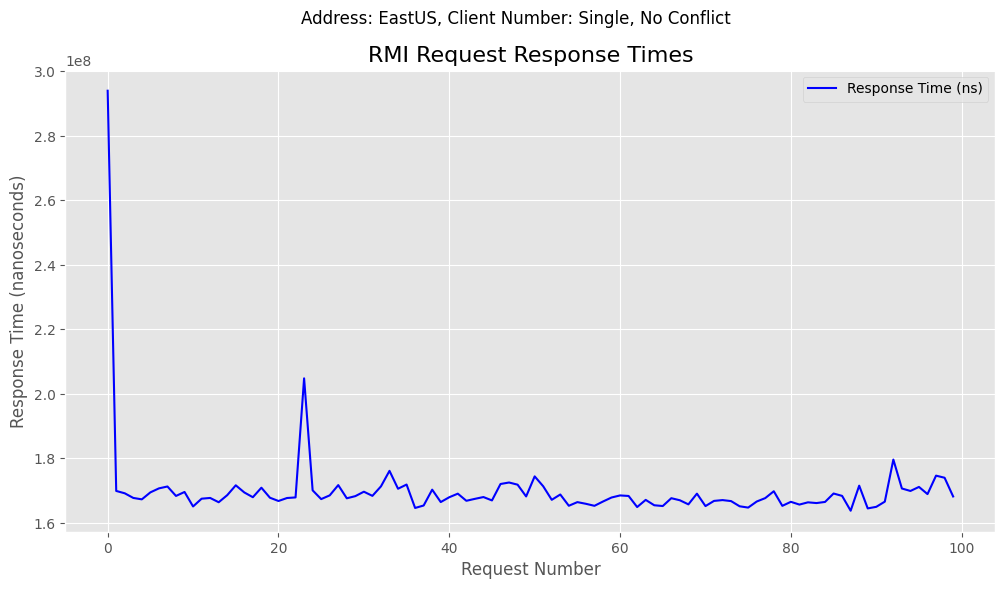

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Setting the folder and file paths for data and saving the figure
data_folder_path = 'Data'
image_folder_path = 'images'
data_file_name = 'run1-NorthEurope.csv'
image_file_name = 'single_NorthEurope.png'
sub_title='Address: NorthEurope, Client Number: Single, No Conflict'

# Constructing full file paths
data_file_path = f'{data_folder_path}/{data_file_name}'
image_file_path = f'{image_folder_path}/{image_file_name}'

# Ensure the images folder exists
import os
if not os.path.exists(image_folder_path):
    os.makedirs(image_folder_path)

# Reading the CSV file data
data = pd.read_csv(data_file_path)

# Setting the plot style and size
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')

# Plotting the response time
plt.plot(data['Response Time (ns)'], label='Response Time (ns)', color='blue')
plt.title('RMI Request Response Times', fontsize=16)
plt.suptitle(sub_title, fontsize=12)
plt.xlabel('Request Number')
plt.ylabel('Response Time (nanoseconds)')
plt.legend()
plt.grid(True)

# Saving the plot to a file
plt.savefig(image_file_path)

# Displaying the plot
plt.show()


Extract First, mark mean value

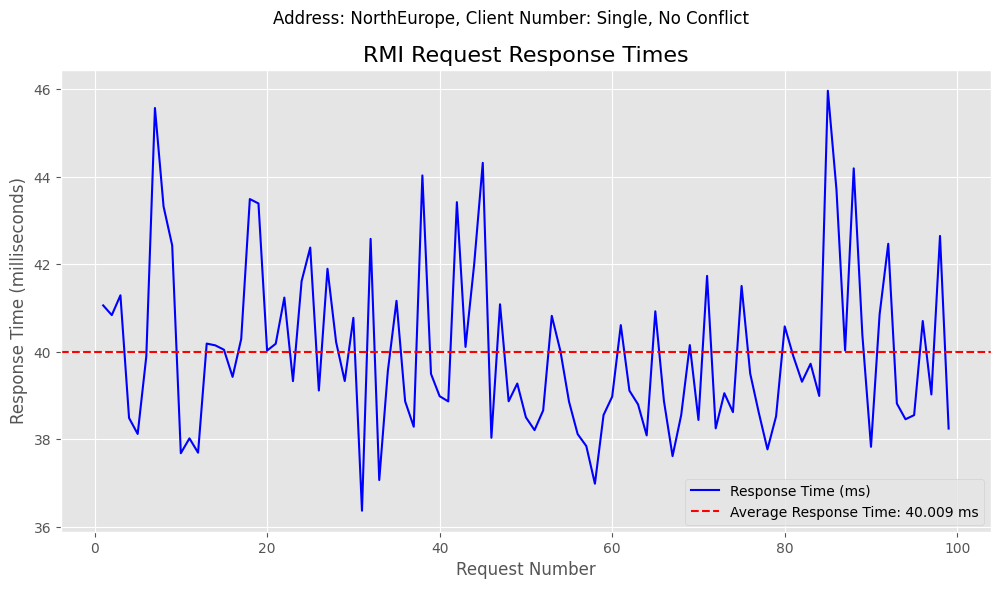

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Setting the folder and file paths for data and saving the figure
data_folder_path = 'Data'
image_folder_path = 'images'
data_file_name = 'run1-NorthEurope.csv'
image_file_name = 'single_NorthEurope_mean.png'
sub_title='Address: NorthEurope, Client Number: Single, No Conflict'
# Constructing full file paths
data_file_path = f'{data_folder_path}/{data_file_name}'
image_file_path = f'{image_folder_path}/{image_file_name}'

# Ensure the images folder exists
import os
if not os.path.exists(image_folder_path):
    os.makedirs(image_folder_path)

# Reading the CSV file data and excluding the first data point
data = pd.read_csv(data_file_path)
data = data['Response Time (ns)'][1:]  # Excluding the first data point

# Calculating the average response time in milliseconds
average_response_time_ms = data.mean() / 1_000_000  # Converting nanoseconds to milliseconds

# Converting the entire dataset to milliseconds for plotting
data_ms = data / 1_000_000  # Converting nanoseconds to milliseconds

# Setting the plot style and size
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')

# Plotting the response time and the average line in milliseconds
plt.plot(data_ms, label='Response Time (ms)', color='blue')
plt.axhline(y=average_response_time_ms, color='red', linestyle='--', label=f'Average Response Time: {average_response_time_ms:.3f} ms')

# Setting the title, labels, and legend
plt.title('RMI Request Response Times', fontsize=16)
plt.suptitle(sub_title, fontsize=12)
plt.xlabel('Request Number')
plt.ylabel('Response Time (milliseconds)')
plt.legend()
plt.grid(True)

# Saving the plot to a file
plt.savefig(image_file_path)

# Displaying the plot
plt.show()


Compare different region

Single Client

C:\Users\Oliver\AppData\Local\Temp\ipykernel_8572\2895234458.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Response Time', data=data_melted, palette=colors)


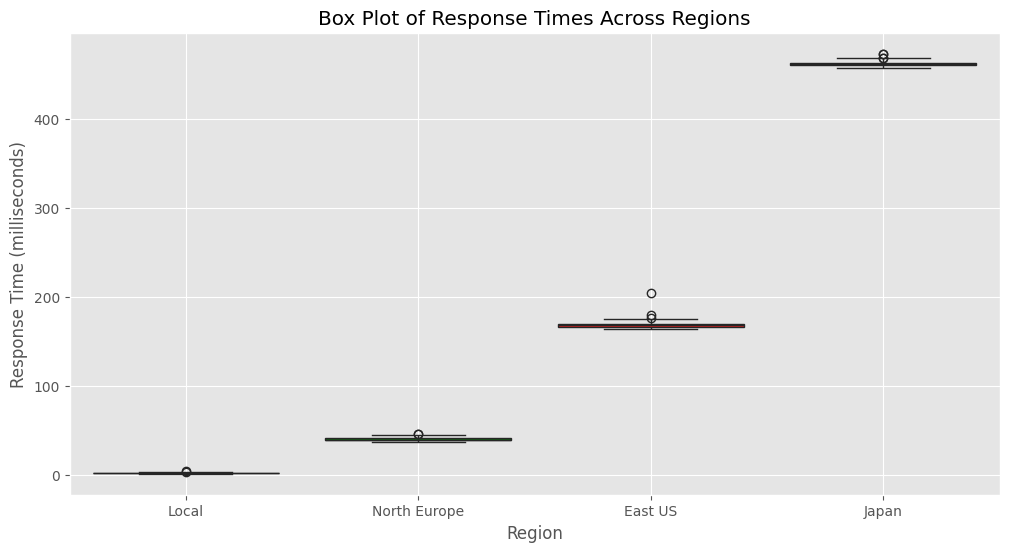

C:\Users\Oliver\AppData\Local\Temp\ipykernel_8572\2895234458.py:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(response_times[region], label=region, color=colors[region], shade=True)
C:\Users\Oliver\AppData\Local\Temp\ipykernel_8572\2895234458.py:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(response_times[region], label=region, color=colors[region], shade=True)
C:\Users\Oliver\AppData\Local\Temp\ipykernel_8572\2895234458.py:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(response_times[region], label=region, color=colors[region], shade=True)
C:\Users\Oliver\AppData\Local\Temp\ipykernel_8572\2895234458.py:39: Fu

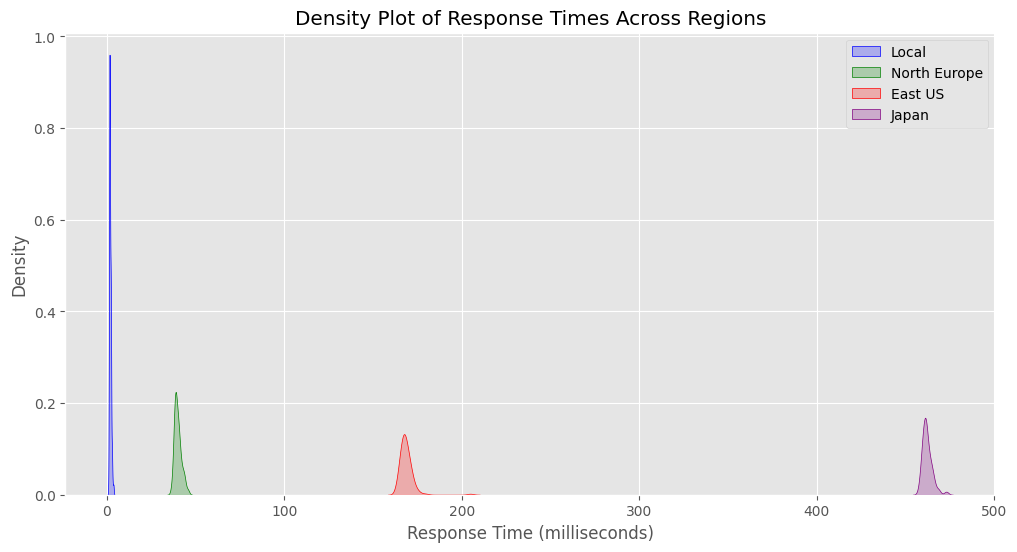

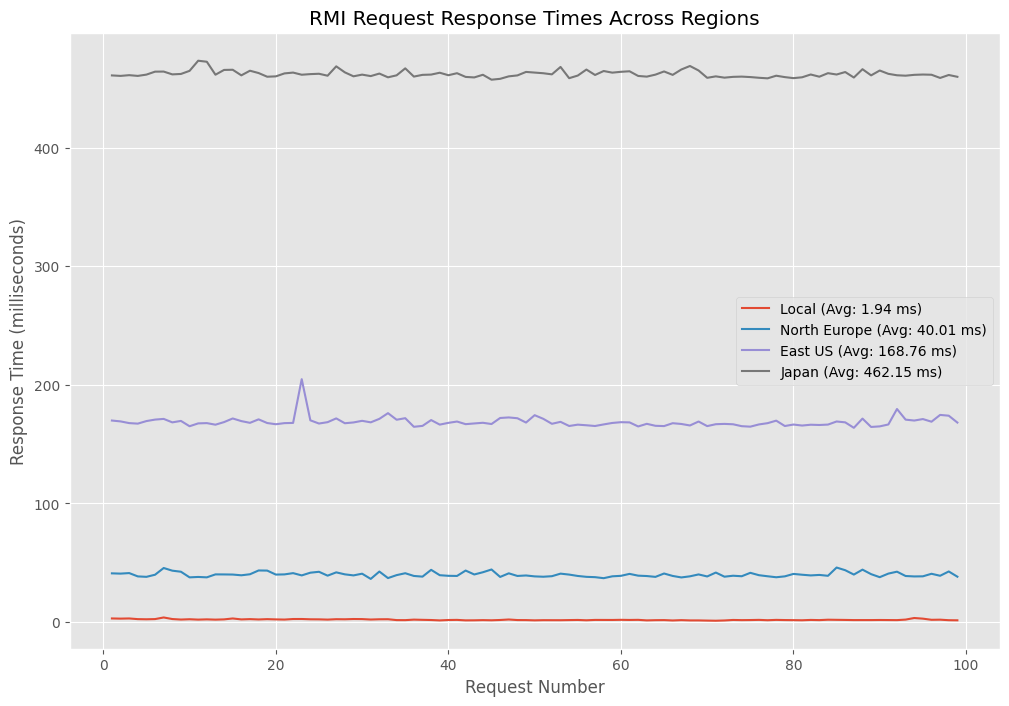

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming we already have the response_times data loaded from previous steps
# Let's construct a DataFrame for plotting from the individual DataFrames we have

# Data loading and preparation
file_paths = {
    'Local': './Data/run1-Local.csv',
    'North Europe': './Data/run1-NorthEurope.csv',
    'East US': './Data/run1-EastUS.csv',
    'Japan': './Data/run1-Japan.csv'
}

# Loading data and skipping the first data point
response_times = {region: pd.read_csv(path)['Response Time (ns)'][1:] / 1_000_000 for region, path in file_paths.items()}  # Convert to ms

# Creating a DataFrame for plotting
data = pd.DataFrame({region: times for region, times in response_times.items()})
data_melted = data.melt(var_name='Region', value_name='Response Time')

# Set distinct colors for each region
colors = {'Local': 'blue', 'North Europe': 'green', 'East US': 'red', 'Japan': 'purple'}

# Creating box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Response Time', data=data_melted, palette=colors)
plt.title('Box Plot of Response Times Across Regions')
plt.ylabel('Response Time (milliseconds)')
plt.grid(True)
# Saving the plot to a file
plt.savefig('./images/box_single')
plt.show()

# Creating density plot
plt.figure(figsize=(12, 6))
for region in response_times:
    sns.kdeplot(response_times[region], label=region, color=colors[region], shade=True)
plt.title('Density Plot of Response Times Across Regions')
plt.xlabel('Response Time (milliseconds)')
plt.legend()
plt.grid(True)
# Saving the plot to a file
plt.savefig('./images/density_single')
plt.show()

# Load the data, excluding the first record, and compute the average response time
response_times = {}
averages = {}
for region, file_path in file_paths.items():
    data = pd.read_csv(file_path)['Response Time (ns)'][1:] / 1_000_000  # convert ns to ms and skip first data point
    response_times[region] = data
    averages[region] = data.mean()

# Plotting the data
plt.figure(figsize=(12, 8))
for region, data in response_times.items():
    plt.plot(data, label=f"{region} (Avg: {averages[region]:.2f} ms)")

plt.title('RMI Request Response Times Across Regions')
plt.xlabel('Request Number')
plt.ylabel('Response Time (milliseconds)')
plt.legend()
plt.grid(True)
# Saving the plot to a file
plt.savefig('./images/responses_single')
plt.show()


Compare Signle/Multi/Multi-Conflict Response

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming we already have the response_times data loaded from previous steps
# Let's construct a DataFrame for plotting from the individual DataFrames we have

# Data loading and preparation
file_paths = {
    'Single': './Data/run1-EastUS.csv',
    'Multi-No Conflict': './Data/run2-EastUS.csv',
    'Multi-Conflict': './Data/run3-EastUS.csv',
}

# Loading data and skipping the first data point
response_times = {region: pd.read_csv(path)['Response Time (ns)'][1:] / 1_000_000 for region, path in file_paths.items()}  # Convert to ms

# Creating a DataFrame for plotting
data = pd.DataFrame({region: times for region, times in response_times.items()})
data_melted = data.melt(var_name='Region', value_name='Response Time')

# Set distinct colors for each region
colors = {'Single': 'blue', 'Multi-No Conflict': 'green', 'Multi-Conflict': 'red'}

# Load the data, excluding the first record, and compute the average response time
response_times = {}
averages = {}
for region, file_path in file_paths.items():
    data = pd.read_csv(file_path)['Response Time (ns)'][1:] / 1_000_000  # convert ns to ms and skip first data point
    response_times[region] = data
    averages[region] = data.mean()

# Plotting the data
plt.figure(figsize=(12, 8))
for region, data in response_times.items():
    plt.plot(data, label=f"{region} (Avg: {averages[region]:.2f} ms)")

plt.title('RMI Request Response Times Across Regions')
plt.xlabel('Request Number')
plt.ylabel('Response Time (milliseconds)')
plt.legend()
plt.grid(True)
# Saving the plot to a file
plt.savefig('./images/responses_single')
plt.show()
